In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Hackathon2\\Online_Retail_Sales_Analysis\\jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Hackathon2\\Online_Retail_Sales_Analysis'

In [19]:
# Importing necessary libraries for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st

In [20]:
# Storing the url of the dataset and storing it in a DataFrame
url = "https://raw.githubusercontent.com/bvhadra/Online_Retail_Sales_Analysis/refs/heads/main/Online%20Retail.csv"
df_T= pd.read_csv(url) 

In [21]:
# Display the first few rows of the DataFrame to confirm successful import
print(df_T.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [22]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df_T.isna().sum())


Missing values in each column:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [23]:
# Filter the dataset to include only the United Kingdom
df_uk = df_T[df_T['Country'] == 'United Kingdom']

# Verify the filter by checking the unique countries again
unique_countries_after_filter = df_uk['Country'].unique()
print("Unique values in 'Country' column after filtering:", unique_countries_after_filter)

Unique values in 'Country' column after filtering: ['United Kingdom']


In [24]:
df_T=df_T.dropna()

In [25]:
print("\nMissing values in each column:")
print(df_T.isna().sum())


Missing values in each column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [26]:
def get_first_n_rows_per_month(df, date_column, n=400):  # Value column is no longer needed
    """
    Extracts the first n rows for each month from a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame.
        date_column: The name of the column containing the dates.
        n: The number of rows to extract per month (default: 400).

    Returns:
        A new Pandas DataFrame containing the extracted rows, or None if there's an issue.
    """

    try:
        # 1. Ensure the date column is datetime objects
        df[date_column] = pd.to_datetime(df[date_column])

        # 2. Set the date column as the index (optional but often helpful)
        df = df.set_index(date_column)

        # 3. Sort by date (important for getting the "first" rows)
        df = df.sort_index()

        # 4. Group by year and month
        grouped = df.groupby([df.index.year, df.index.month])

        # 5. Extract the first n rows from each group
        result = []
        for name, group in grouped:
            result.append(group.head(n))  # Now we're appending the entire group (rows)
            
        return pd.concat(result)

    except (KeyError, TypeError) as e:  # Handle potential errors
        print(f"Error: {e}")
        return None



# Example usage (replace 'date' with your actual date column name):
extracted_rows = get_first_n_rows_per_month(df_T, 'InvoiceDate', n=400) # Replace 'date' with your actual column name.

if extracted_rows is not None:
    print(extracted_rows)
    # You can now work with the 'extracted_rows' DataFrame
    # For example, save it to a CSV file:
    # extracted_rows.to_csv("extracted_data.csv")

                    InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2010-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...                       ...       ...                                  ...   
2011-12-01 11:00:00    579949    84968E      SET OF 16 VINTAGE BLACK CUTLERY   
2011-12-01 11:00:00    579949     23376  PACK OF 12 VINTAGE CHRISTMAS TISSUE   
2011-12-01 11:00:00    579949     23234        BISCUIT TIN VINTAGE CHRISTMAS   
2011-12-01 11:00:00    579949     84879        ASSORTED COLOUR BIRD ORNAMENT   
2011-12-01 11:00:00    579949     21790 

In [27]:
extracted_rows=extracted_rows.reset_index()

In [28]:
print(extracted_rows.columns)

Index(['InvoiceDate', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [29]:
month_periods = extracted_rows['InvoiceDate'].dt.to_period('M') # creates a series of month periods
unique_months = month_periods.nunique()
print(f"Number of unique months: {unique_months}")

Number of unique months: 13


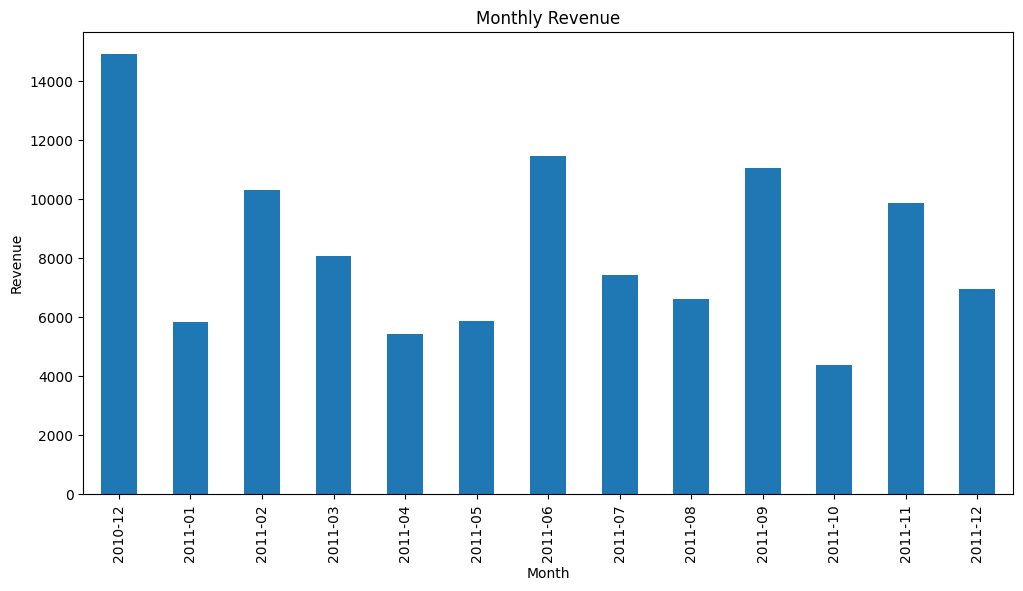

In [30]:
# Calculate the revenue for each row
extracted_rows['Revenue'] = extracted_rows['Quantity'] * extracted_rows['UnitPrice']

# Group by month and calculate the total revenue for each month
monthly_revenue = extracted_rows.groupby(extracted_rows['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

# Plot the bar chart
monthly_revenue.plot(kind='bar', figsize=(12, 6), title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

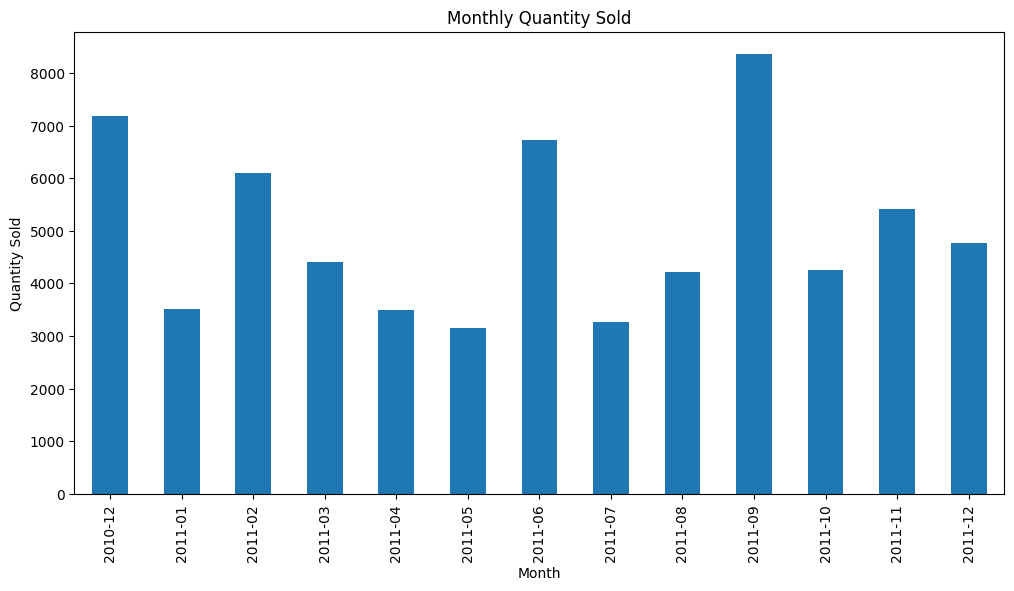

In [31]:
# Monthly Quantity Sold
monthly_quantity = extracted_rows.groupby(extracted_rows['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_quantity.plot(kind='bar', figsize=(12, 6), title='Monthly Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()

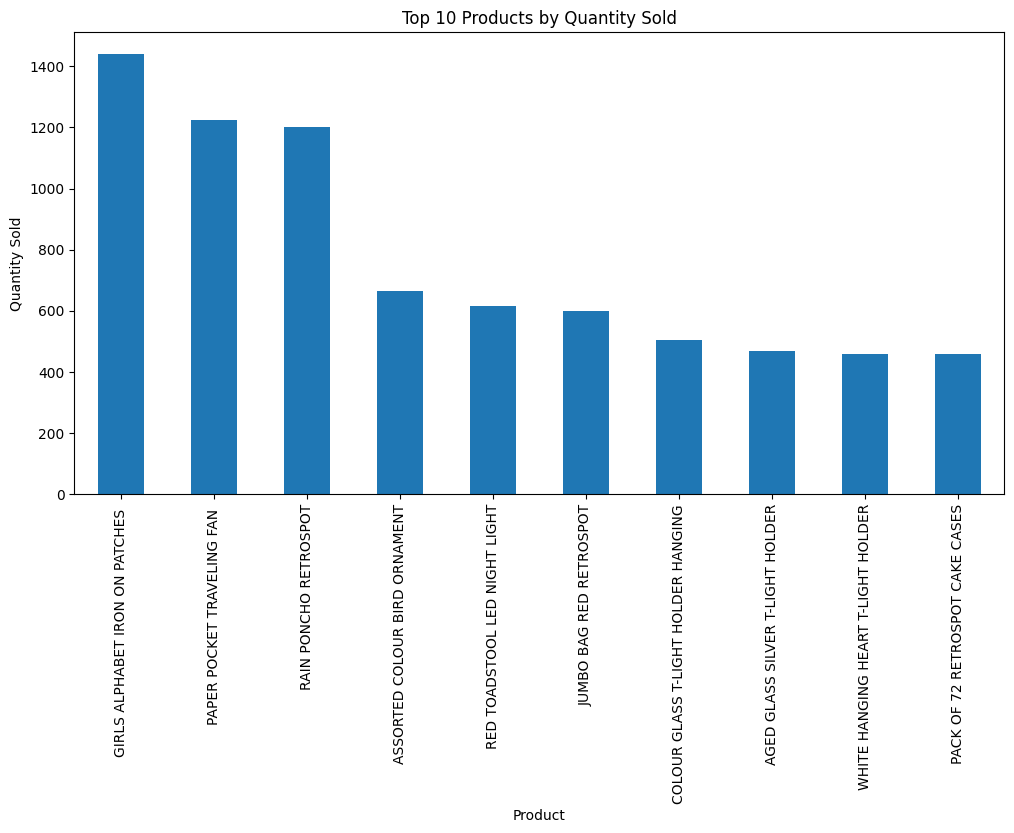

In [32]:
# Top 10 Products by Quantity Sold
top_products = extracted_rows.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

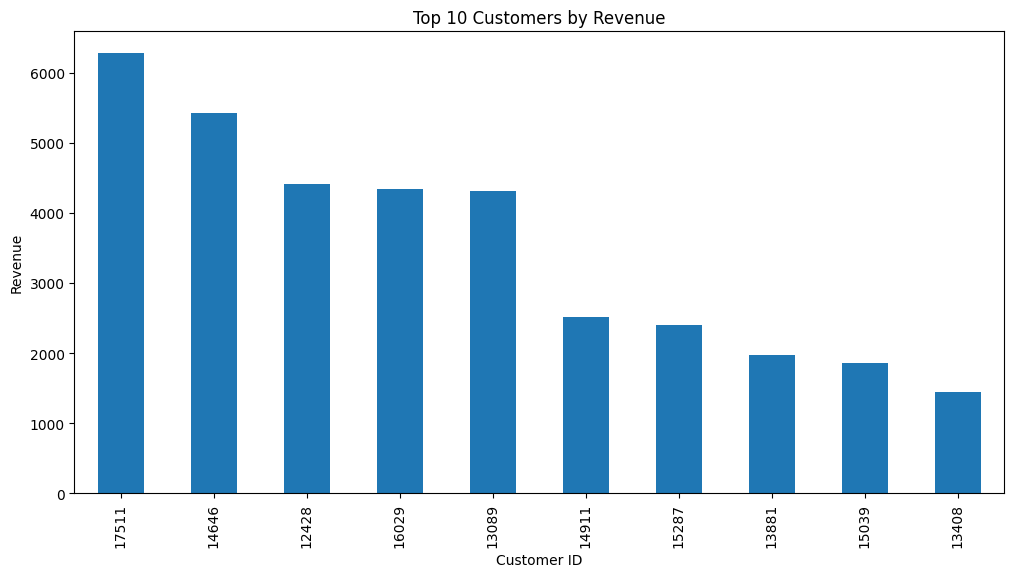

In [33]:
# Top 10 Customers by Revenue
top_customers = extracted_rows.groupby('CustomerID')['Revenue'].sum().nlargest(10)
top_customers.plot(kind='bar', figsize=(12, 6), title='Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()

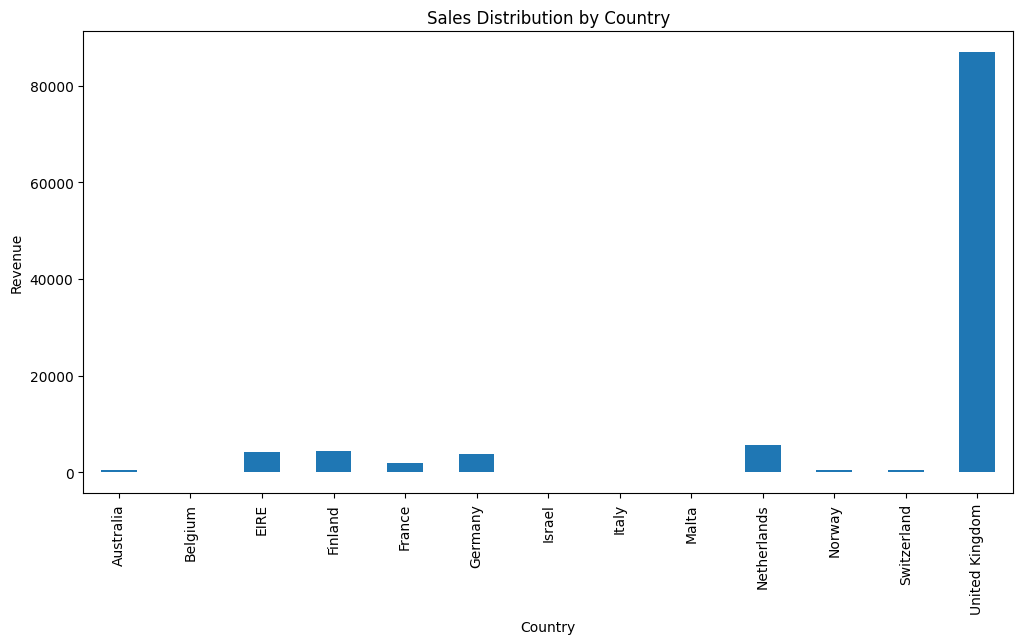

In [34]:
# Sales Distribution by Country
sales_by_country = extracted_rows.groupby('Country')['Revenue'].sum()
sales_by_country.plot(kind='bar', figsize=(12, 6), title='Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

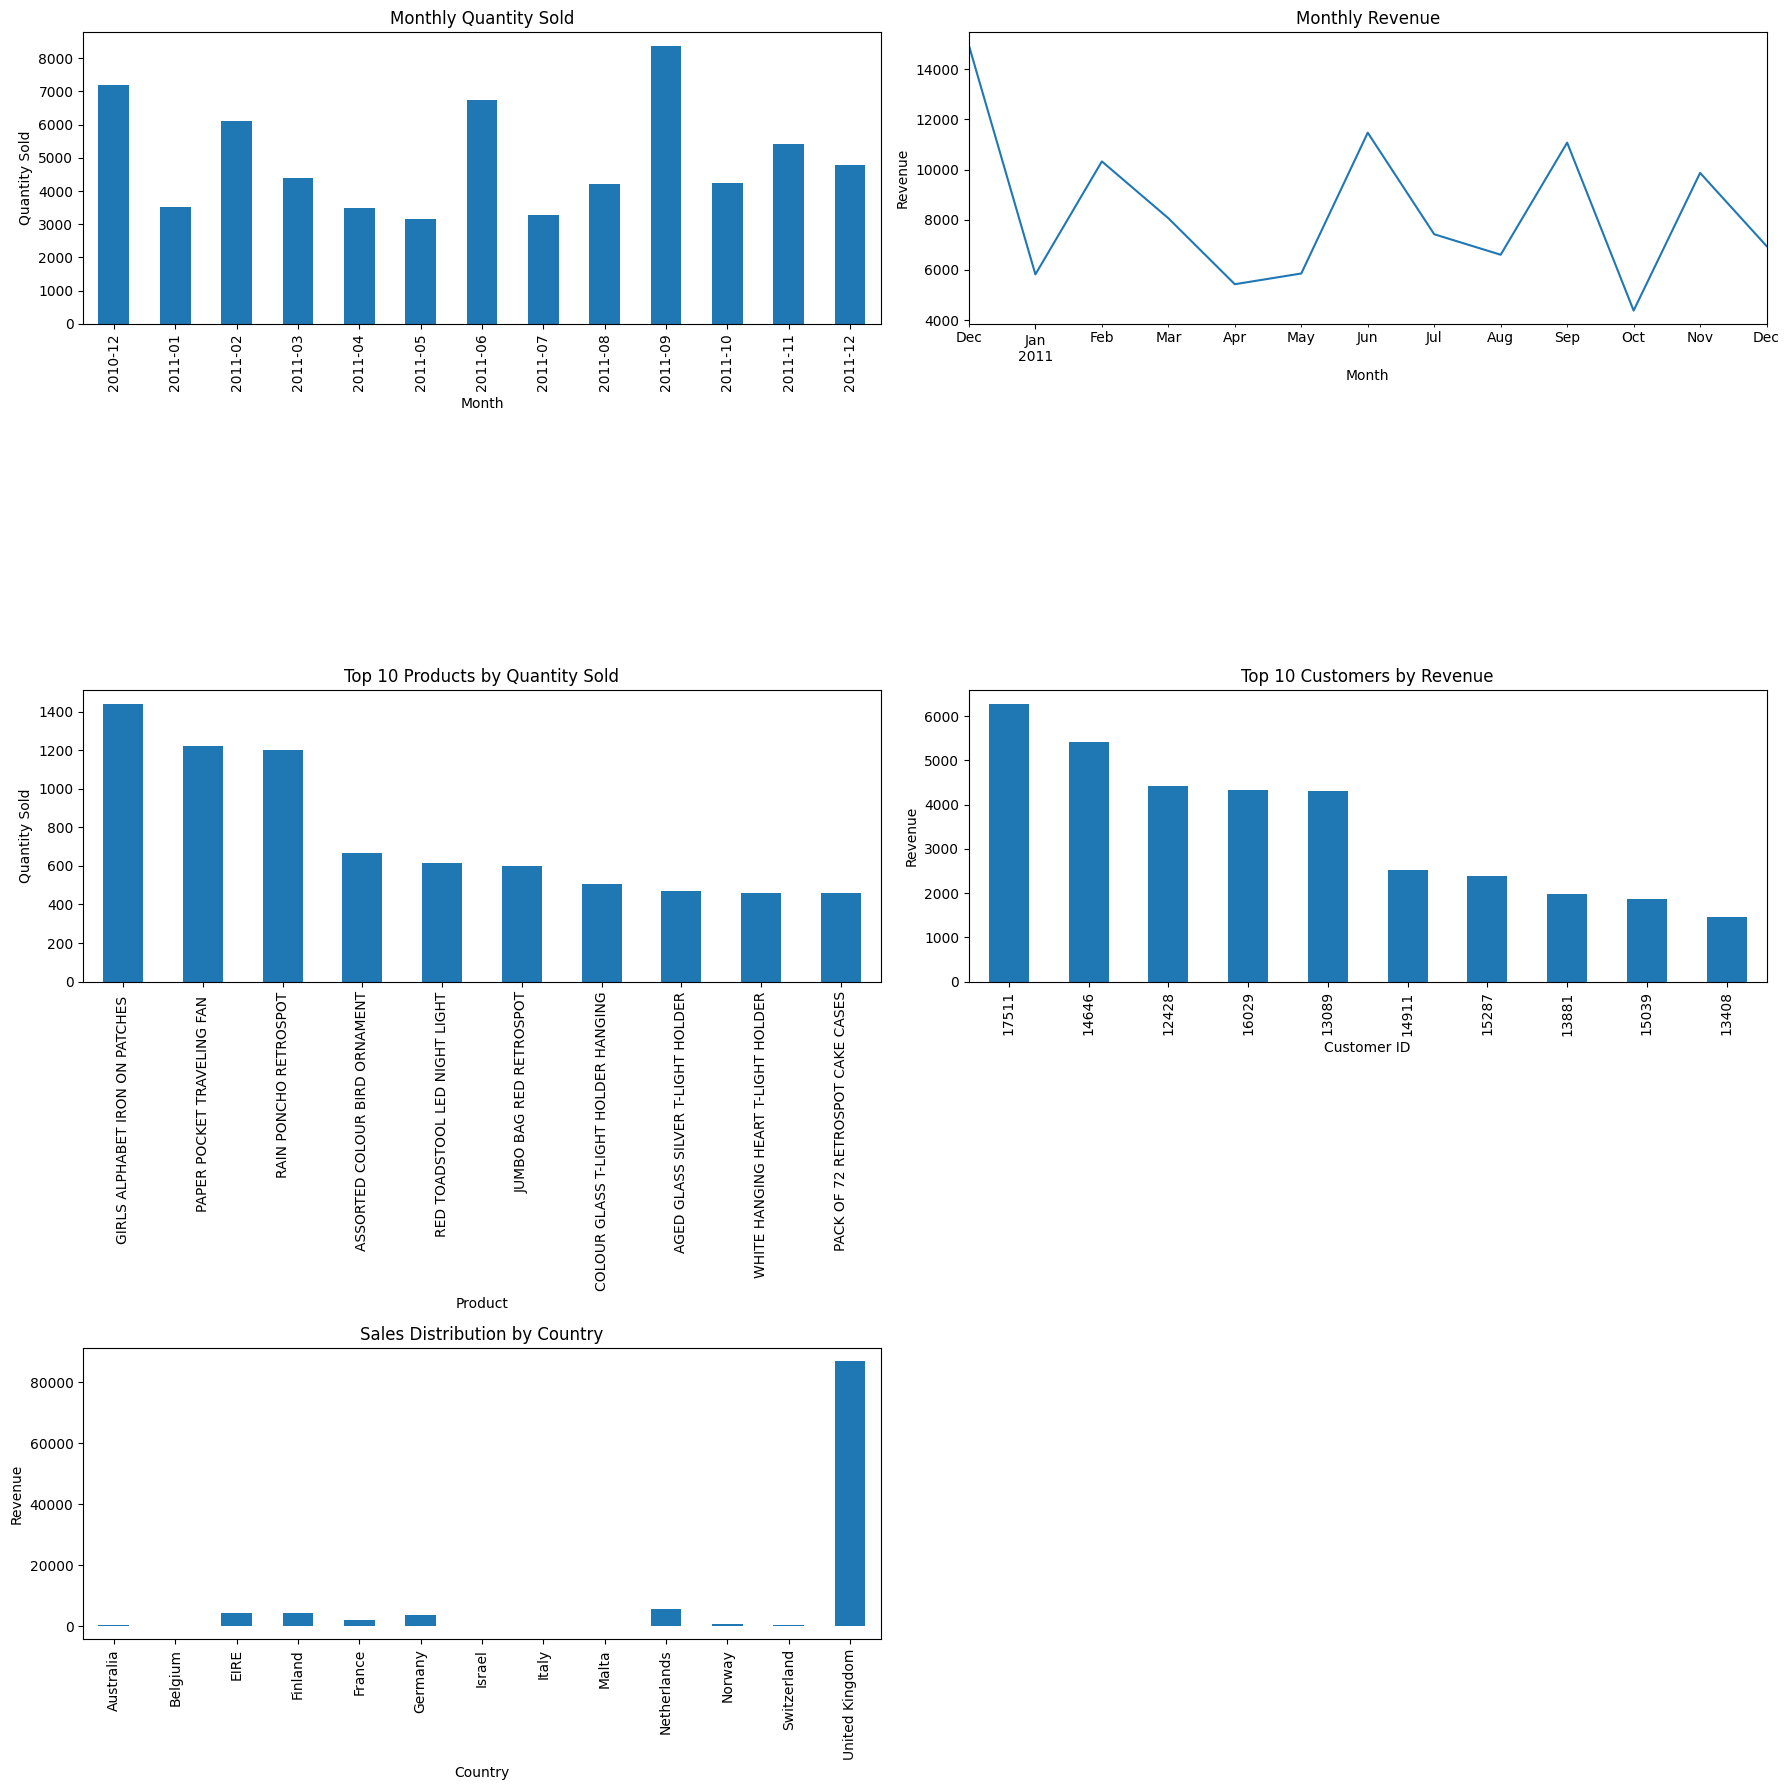

In [35]:
import matplotlib.pyplot as plt

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Monthly Quantity Sold
monthly_quantity = extracted_rows.groupby(extracted_rows['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_quantity.plot(kind='bar', ax=axes[0, 0], title='Monthly Quantity Sold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Quantity Sold')

# Monthly Revenue
extracted_rows['Revenue'] = extracted_rows['Quantity'] * extracted_rows['UnitPrice']
monthly_revenue = extracted_rows.groupby(extracted_rows['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
monthly_revenue.plot(kind='line', ax=axes[0, 1], title='Monthly Revenue')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Revenue')

# Top 10 Products by Quantity Sold
top_products = extracted_rows.groupby('Description')['Quantity'].sum().nlargest(10)
top_products.plot(kind='bar', ax=axes[1, 0], title='Top 10 Products by Quantity Sold')
axes[1, 0].set_xlabel('Product')
axes[1, 0].set_ylabel('Quantity Sold')

# Top 10 Customers by Revenue
top_customers = extracted_rows.groupby('CustomerID')['Revenue'].sum().nlargest(10)
top_customers.plot(kind='bar', ax=axes[1, 1], title='Top 10 Customers by Revenue')
axes[1, 1].set_xlabel('Customer ID')
axes[1, 1].set_ylabel('Revenue')

# Sales Distribution by Country
sales_by_country = extracted_rows.groupby('Country')['Revenue'].sum()
sales_by_country.plot(kind='bar', ax=axes[2, 0], title='Sales Distribution by Country')
axes[2, 0].set_xlabel('Country')
axes[2, 0].set_ylabel('Revenue')

# Hide the empty subplot (bottom right)
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()